In [16]:
from pathlib import Path

from matplotlib import pyplot as plt
import pandas as pd

In [2]:
datadir = Path("../data/mass")
fnames = ["PABPC1 PABPN1_IP-mass_replicate-1st.csv", "PABPC1 PABPN1_IP-mass_replicate-2nd.csv"]
flabels = ["rep1", "rep2"]
common_cols = ["Protein IDs", "Majority protein IDs", "LFQ intensity_PABPC1", "LFQ intensity_Myc"]


In [4]:
dfs = {}
for flabel, fname in zip(flabels, fnames):
    inpfpath = datadir/fname
    dfs[flabel] = pd.read_csv(inpfpath).loc[:, common_cols].copy()

In [6]:
pseudocount = 1e4 # in lfq intensity

df_rep1 = dfs["rep1"].copy()
df_rep1["log2fc"] = np.log2( (df_rep1["LFQ intensity_PABPC1"] + pseudocount) / 
                             (df_rep1["LFQ intensity_Myc"] + pseudocount) )
df_rep2 = dfs["rep2"].copy()
df_rep2["log2fc"] = np.log2( (df_rep2["LFQ intensity_PABPC1"] + pseudocount) / 
                             (df_rep2["LFQ intensity_Myc"] + pseudocount) )


In [9]:
enrichment_cutoff = 2 # in log2
df_enriched1 = df_rep1[df_rep1["log2fc"] > enrichment_cutoff]
df_enriched2 = df_rep2[df_rep2["log2fc"] > enrichment_cutoff]
print( len(df_enriched1), len(df_enriched2) )

130 62


In [10]:
savetxt = False
df_merged = pd.merge(df_enriched1, df_enriched2, how="inner", on=["Protein IDs", "Majority protein IDs"], suffixes=["_r1", "_r2"])
print( len(df_merged)) 
if savetxt is True:
    outtxtpath = "texts/pabpc1_ip-ms_enriched_log2_{}_rep12_merged.csv".format(enrichment_cutoff)
    df_merged.to_csv(outtxtpath)
    
df_merged.head()

18


,Protein IDs,Majority protein IDs,LFQ intensity_PABPC1_r1,LFQ intensity_Myc_r1,log2fc_r1,LFQ intensity_PABPC1_r2,LFQ intensity_Myc_r2,log2fc_r2
0,PABP1_HUMAN;PABP3_HUMAN;PAP1L_HUMAN;PABP5_HUMAN,PABP1_HUMAN,3.788200e+10,0.0,21.853081,3.046000e+11,4.259500e+09,6.160085
1,FIBG_HUMAN,FIBG_HUMAN,1.540300e+10,0.0,20.554781,8.221000e+09,2.267100e+08,5.180332
2,FINC_HUMAN,FINC_HUMAN,5.939200e+09,0.0,19.179912,1.544600e+09,0.000000e+00,17.236883
3,PABP4_HUMAN;PAB4L_HUMAN,PABP4_HUMAN,3.808200e+09,0.0,18.538754,6.881500e+10,8.128600e+08,6.403555
4,ABCB9_HUMAN,ABCB9_HUMAN,9.408700e+08,0.0,16.521723,5.905300e+08,0.000000e+00,15.849747


In [11]:
df_merged.loc[df_merged[["log2fc_r1", "log2fc_r2"]].mean(axis=1).sort_values(ascending=False).index]

,Protein IDs,Majority protein IDs,LFQ intensity_PABPC1_r1,LFQ intensity_Myc_r1,log2fc_r1,LFQ intensity_PABPC1_r2,LFQ intensity_Myc_r2,log2fc_r2
2,FINC_HUMAN,FINC_HUMAN,5.939200e+09,0.0,19.179912,1.544600e+09,0.000000e+00,17.236883
8,PABP2_HUMAN;EPAB2_HUMAN,PABP2_HUMAN,1.194100e+08,0.0,13.543757,6.785600e+09,0.000000e+00,19.372119
4,ABCB9_HUMAN,ABCB9_HUMAN,9.408700e+08,0.0,16.521723,5.905300e+08,0.000000e+00,15.849747
12,LAR4B_HUMAN,LAR4B_HUMAN,6.177900e+07,0.0,12.593134,3.181900e+09,0.000000e+00,18.279534
9,PAIP1_HUMAN,PAIP1_HUMAN,1.193100e+08,0.0,13.542548,1.508100e+09,0.000000e+00,17.202382
11,HNRPR_HUMAN,HNRPR_HUMAN,8.372000e+07,0.0,13.031529,1.211200e+09,0.000000e+00,16.886089
15,MKRN1_HUMAN,MKRN1_HUMAN,3.811000e+07,0.0,11.896332,1.228400e+09,0.000000e+00,16.906433
0,PABP1_HUMAN;PABP3_HUMAN;PAP1L_HUMAN;PABP5_HUMAN,PABP1_HUMAN,3.788200e+10,0.0,21.853081,3.046000e+11,4.259500e+09,6.160085
10,MLF2_HUMAN,MLF2_HUMAN,1.159900e+08,0.0,13.501837,1.711900e+08,0.000000e+00,14.063395
7,TPRN_HUMAN,TPRN_HUMAN,1.410500e+08,0.0,13.784021,1.192000e+08,0.000000e+00,13.541218


#### Draw the enrichemnt fold graph

In [12]:
fc1 = df_rep1.set_index("Protein IDs")["log2fc"]
fc2 = df_rep2.set_index("Protein IDs")["log2fc"]

../plots/ip-ms_enrichment_folds_mini.pdf


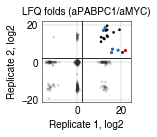

In [15]:
savefig = True
minifig = True
figsize = [3.2,3] if minifig is not True else [1.6,1.5]

x, y = fc1.align(fc2, join="inner")
x_sub = x.loc[df_merged["Protein IDs"]]
y_sub = y.loc[df_merged["Protein IDs"]]
pabpc1 = "PABP1_HUMAN;PABP3_HUMAN;PAP1L_HUMAN;PABP5_HUMAN"
cytrbps = ["PABP4_HUMAN;PAB4L_HUMAN", 
           "LARP1_HUMAN","LARP4_HUMAN",
           "LAR4B_HUMAN","MKRN1_HUMAN",]

styles = ["barricade"]
if minifig is True: styles.append("mini")
with plt.style.context(styles):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    ax.scatter(x,y,s=7, label=None, alpha=0.2, edgecolor="none", rasterized=True)
    ax.scatter(x_sub, y_sub, s=7, alpha=1, color="black", edgecolor="none")
    ax.scatter(x_sub.loc[cytrbps], y_sub.loc[cytrbps], s=7, alpha=1, c="#1D70B7", edgecolor="none")
    ax.scatter(x.loc[pabpc1], y.loc[pabpc1], color="red", label="PABPC1", s=10, edgecolor="none")
    ax.grid(True)
    
    if minifig is not True:
        ax.set_xlabel("LFQ fold (aPABPC1/aMYC, log2, rep 1")
        ax.set_ylabel("LFQ fold (aPABPC1/aMYC, log2, rep 2")
        ax.set_title("PABPC1 co-IP - LC-MS/MS", fontsize="medium")

    else:
        ax.set_xlabel("Replicate 1, log2")
        ax.set_ylabel("Replicate 2, log2")
        ax.set_title("LFQ folds (aPABPC1/aMYC)", fontsize="medium")
        
    ax.axvline(x=enrichment_cutoff)
    ax.axhline(y=enrichment_cutoff)

    if savefig is True:
        outfigpath = "../plots/ip-ms_enrichment_folds.pdf"
        if minifig is True:
            outfigpath = "../plots/ip-ms_enrichment_folds_mini.pdf"
        plt.savefig(outfigpath, dpi=300, bbox_inches="tight")
        print(outfigpath)
        
    plt.show()

In [14]:
for n in [x.split("_")[0] for x in list(df_merged["Majority protein IDs"].values)]:
    print( n)

PABP1
FIBG
FINC
PABP4
ABCB9
LARP1
LARP4
TPRN
PABP2
PAIP1
MLF2
HNRPR
LAR4B
SOAT1
A2MG
MKRN1
CO3
ARC1B
